(513, 580)


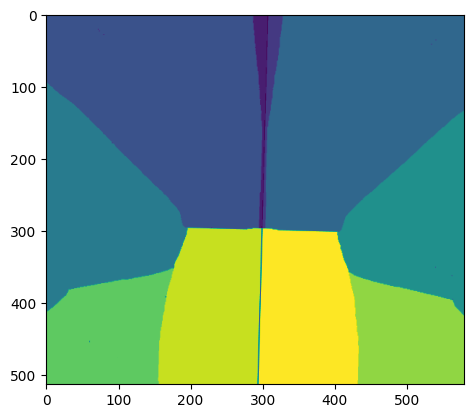

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


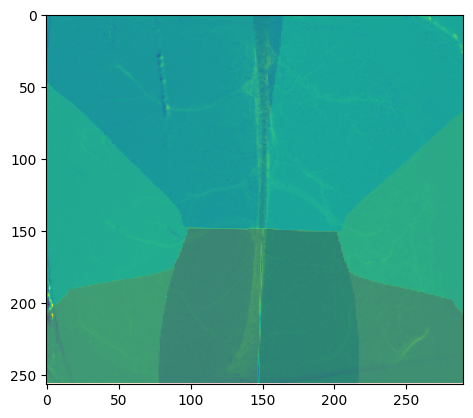

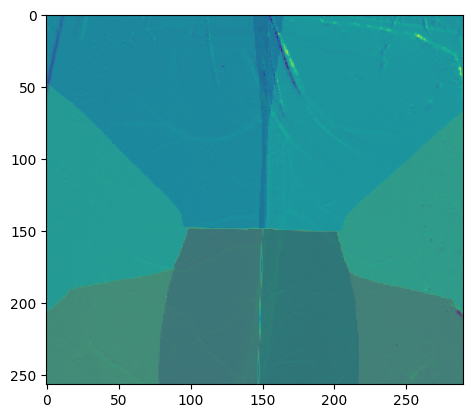

In [7]:
import tifffile
import numpy as np
from toolbox_jocha.hdf5 import get_data_from_dataset
import matplotlib.pyplot as plt

def read_data(filename):
    """Read data in tiff or npy files
    """
        
    if filename[-4:] == ".tif":
        return tifffile.imread(filename)
    
    elif filename[-4:] == ".npy":
        return np.load(filename)
    
    raise ValueError("Could not recognize file extension.")


# raw_green = read_data(f"D:/mouse_data/new_data/M308-14/raw_data/rawdata_green.tif")
# print(raw_green.shape)

# raw_green2 = read_data(f"D:/mouse_data/new_data/M308-14/raw_data/green_avg.npy")
# print(raw_green2.shape)

# raw_gcamp = read_data(f"D:/mouse_data/new_data/M308-14/raw_data/GCaMP.tif")
# print(raw_gcamp.shape)

# gcamp, _ = get_data_from_dataset(f"D:/mouse_data/new_data/M308-14/formatted/M308-14_RAW.h5", "data/3d/GCaMP")
# print(gcamp.shape)

# gcamp2, _ = get_data_from_dataset(f"D:/mouse_data/new_data/M308-14/formatted/M308-14_v1.h5", "data/3d/GCaMP")
# print(gcamp2.shape)

# (1440, 564, 587)
# (282, 293)
# (1440, 282, 293)
# (1440, 282, 293)
# (1440, 247, 242)

atlas = read_data(f"D:/mouse_data/new_data/M308-14/atlas.npy")
print(atlas.shape)

plt.imshow(atlas)
plt.show()

regions = set(atlas.flatten())
print(regions)

atlas = atlas[::2,::2]

ver1, _ = get_data_from_dataset(f"D:/mouse_data/new_data/M308-8/formatted/M308-8_RAW.h5", "data/3d/dHbT")
ver2, _ = get_data_from_dataset(f"D:/mouse_data/new_data/M308-14/formatted/M308-14_RAW.h5", "data/3d/dHbT")


fig, ax = plt.subplots()
im1 = ax.imshow(ver1[0,:,:], cmap="viridis")
im2 = ax.imshow(atlas, cmap="jet", alpha=0.15)
plt.show()

fig, ax = plt.subplots()
im1 = ax.imshow(ver2[0,:,:], cmap="viridis")
im2 = ax.imshow(atlas, cmap="jet", alpha=0.15)
plt.show()

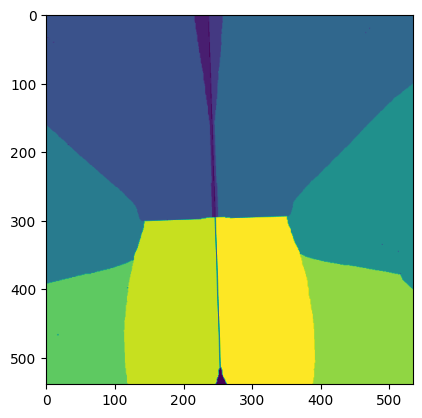

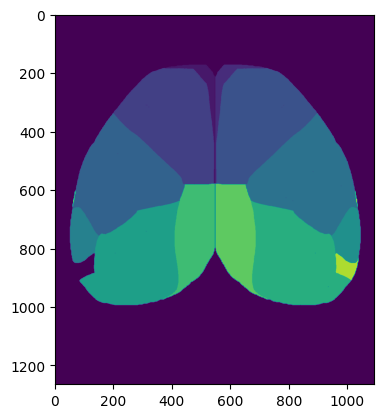

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dictionary loaded successfully:
{'x': -198, 'y': -184, 'angle': 1.908482142857153, 'alpha': 0.3, 'scale': 1.0, 'contrast': 6.0, 'pad': 100, 'h': 539, 'w': 535}


In [22]:
import tifffile
import numpy as np
from toolbox_jocha.hdf5 import get_data_from_dataset
import matplotlib.pyplot as plt
import pickle

def read_data(filename):
    """Read data in tiff or npy files
    """
        
    if filename[-4:] == ".tif":
        return tifffile.imread(filename)
    
    elif filename[-4:] == ".npy":
        return np.load(filename)
    
    raise ValueError("Could not recognize file extension.")


atlas = read_data(f"D:/mouse_data/new_data/M316-10/atlas.npy")

plt.imshow(atlas)
plt.show()

raw_atlas = read_data(f"D:/mouse_data/new_data/atlas/outline_mask_coarse.npy")

plt.imshow(raw_atlas)
plt.show()

print(raw_atlas)

with open(f"D:/mouse_data/new_data/M316-10/atlas_params.pkl", 'rb') as file:
    loaded_dictionary = pickle.load(file)
print("Dictionary loaded successfully:")
print(loaded_dictionary)

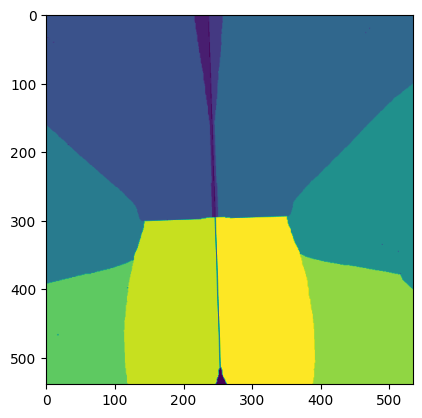

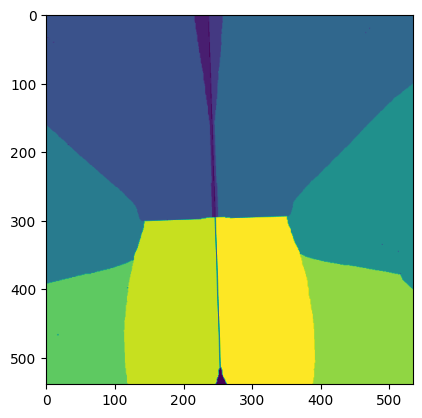

(539, 535)
(539, 535)
True


In [ ]:
from scipy.ndimage import rotate, zoom

def get_transformed_crop(atlas, params):    
    
    x = params['x']
    y = params['y']
    h = params['h']
    w = params['w']
    pad = params['pad']
    scale = params['scale']
    angle = params['angle']
    
    canvas_h, canvas_w = h + 2 * pad, w + 2 * pad

    scaled = zoom(atlas, scale, order=1)
    rotated = rotate(scaled, angle, reshape=False, order=1, mode='constant', cval=0.0)

    H, W = rotated.shape
    overlay = np.zeros((canvas_h, canvas_w), dtype=rotated.dtype)

    x0 = max(0, x)
    y0 = max(0, y)
    x1 = min(canvas_w, x + W)
    y1 = min(canvas_h, y + H)

    rx0 = max(0, -x)
    ry0 = max(0, -y)
    rx1 = rx0 + (x1 - x0)
    ry1 = ry0 + (y1 - y0)

    if x1 > x0 and y1 > y0:
        overlay[y0:y1, x0:x1] = rotated[ry0:ry1, rx0:rx1]

    atlas_registered = overlay[pad:pad + h, pad:pad + w]

    return atlas_registered

new_atlas = get_transformed_crop(raw_atlas, loaded_dictionary)

plt.imshow(new_atlas)
plt.show()

plt.imshow(atlas)
plt.show()

print(new_atlas.shape)
print(atlas.shape)

print(np.allclose(new_atlas, atlas))

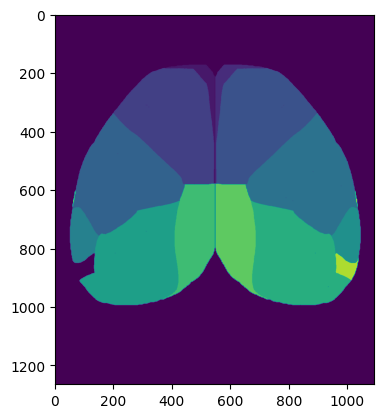

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
  2 2 2 2]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
  2 2 2 2]]


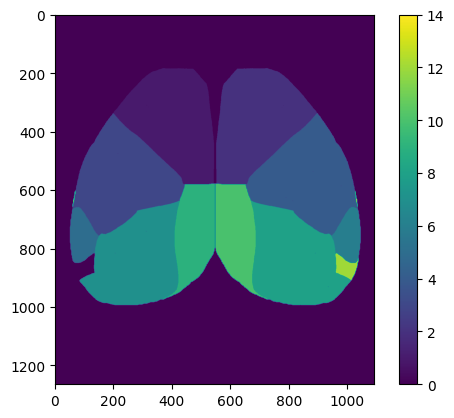

In [37]:
raw_atlas = read_data(f"D:/mouse_data/new_data/atlas/outline_mask_coarse.npy")

plt.imshow(raw_atlas)
plt.show()

raw_atlas = np.asarray(raw_atlas, int)

raw_atlas[raw_atlas==1] = 0
raw_atlas[raw_atlas==2] = 0

raw_atlas = raw_atlas-2
raw_atlas[raw_atlas==-2] = 0

print(raw_atlas[400:410,520:560])

plt.imshow(raw_atlas)
plt.colorbar()
plt.show()

np.save("D:/mouse_data/new_data/atlas/outline_mask_reduced.npy", raw_atlas)